## KNN = K Nearest Neighbours

### KNN Classification:
- K is the number of nearest points.
- K should be odd.
- Calculate the distance to find the nearest points.
- Whatever class the majority of the K points have is what the new point will be predicted to have.

### KNN Regression:
- K is again the number of nearest points.
- Weighted Average approach.
- Calculate the average value of the K points, this is our new point prediction.

- KNN is a Lazy Learner, meaning it doesn't learn when training, instead when it's predicting.
- KNN is sensitive to scale because it relies on distance, and large-valued features can dominate the distance measurements, leading to bias or incorrect predictions.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

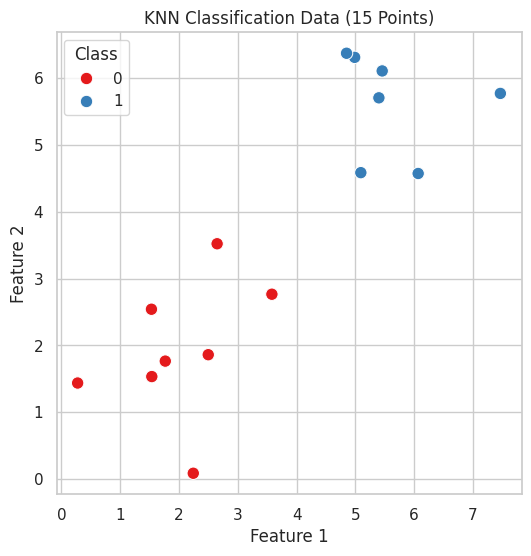

In [2]:
# Generate sample data (15 points, 2 classes)
np.random.seed(42)

# Class 0
x0 = np.random.randn(8, 2) + np.array([2, 2])
# Class 1
x1 = np.random.randn(7, 2) + np.array([6, 6])


# Combine data
X = np.vstack((x0, x1))
y = np.array([0]*8 + [1]*7)


# Create a DataFrame for easier plotting
data = pd.DataFrame({
    'x1': X[:, 0],
    'x2': X[:, 1],
    'class': y
})


# Plot with Seaborn
sns.set(style="whitegrid", context="notebook")
plt.figure(figsize=(6, 6))
sns.scatterplot(data=data, x='x1', y='x2', hue='class', palette='Set1', s=80)

plt.title("KNN Classification Data (15 Points)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Class")
plt.show()

### Changes:

- The centers are now at `(3,3)` and `(4,4)` instead of far apart like before.

- The standard deviation `(* 0.9)` makes the clusters overlap a bit.

- The result: the red and blue points will be partially intermingled, perfect for demonstrating KNN classification.

Random point: [4.05269908 3.32045748]
Predicted class: 1


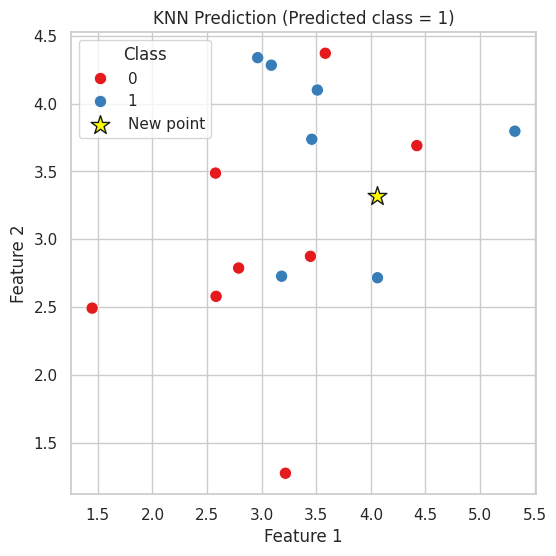

In [3]:
# Step 1: Generate mixed data
np.random.seed(42)

x0 = np.random.randn(8, 2) * 0.9 + np.array([3, 3])   # Class 0
x1 = np.random.randn(7, 2) * 0.9 + np.array([4, 4])   # Class 1

X = np.vstack((x0, x1))
y = np.array([0]*8 + [1]*7)


# Step 2: Fit KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)   # k = 3
knn.fit(X, y)


# Step 3: Pick a random point within the plotting range
rand_point = np.random.uniform(low=2, high=5, size=(1, 2))
pred_class = knn.predict(rand_point)[0]

print(f"Random point: {rand_point[0]}")
print(f"Predicted class: {pred_class}")




# Step 4: Plot
sns.set(style="whitegrid", context="notebook")
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='Set1', s=80, legend='full')

# Plot the random point
plt.scatter(rand_point[0,0], rand_point[0,1],
            color='black' if pred_class==0 else 'yellow',
            edgecolor='k', s=200, marker='*', label='New point')

plt.title(f"KNN Prediction (Predicted class = {pred_class})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Class")
plt.show()

### Explanation:

- A KNN (`k=3`) model is trained on our 15 points.

- A random point is sampled within the data’s range.

- The model predicts which class the new point belongs to.

- The new point appears as a large star marker (⭐). **Black** if `class 0`, **Yellow** if `class 1`.

### Decision Boundary (Extra):
- The mesh grid (xx, yy) defines a fine grid of points across the plot.

- The model predicts the class at each grid point to form a colored background.

- Our original points sit on top of that background.

- A random star-shaped point shows the new sample and its predicted class.

Random point: [4.05269908 3.32045748]
Predicted class: 1


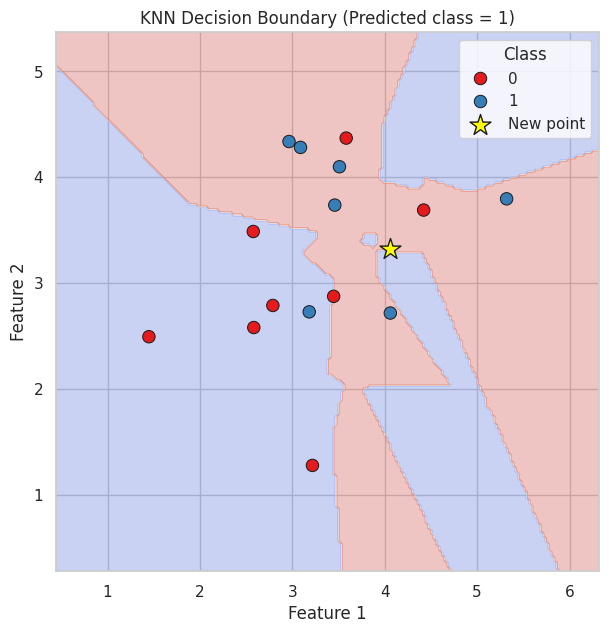

In [4]:
# Step 1: Generate mixed data
np.random.seed(42)

x0 = np.random.randn(8, 2) * 0.9 + np.array([3, 3])   # Class 0
x1 = np.random.randn(7, 2) * 0.9 + np.array([4, 4])   # Class 1

X = np.vstack((x0, x1))
y = np.array([0]*8 + [1]*7)


# Step 2: Fit KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)


# Step 3: Create a grid to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Predict for each grid point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Step 4: Pick a random point and predict
rand_point = np.random.uniform(low=2, high=5, size=(1, 2))
pred_class = knn.predict(rand_point)[0]

print(f"Random point: {rand_point[0]}")
print(f"Predicted class: {pred_class}")


# Step 5: Plot
plt.figure(figsize=(7, 7))
sns.set(style="whitegrid", context="notebook")

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot training points
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='Set1', s=80, edgecolor='k')


# Plot the random point
plt.scatter(rand_point[0,0], rand_point[0,1],
            color='black' if pred_class==0 else 'yellow',
            edgecolor='k', s=250, marker='*', label='New point')

plt.title(f"KNN Decision Boundary (Predicted class = {pred_class})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Class")
plt.show()
